<a href="https://colab.research.google.com/github/SOUMEE2000/Machine-Learning-Stash/blob/main/Disease_prediction_from_medical_imaging(non_intrusive_tests).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Utility Functions**



In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/Datasets/anaemia.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('finish')

finish


In [ ]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/Datasets/Parkinsons.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('finish')

finish


In [ ]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/Datasets/archive (3).zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('finish')

finish


In [ ]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/Datasets/archive.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('finish')

finish


In [ ]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/Datasets/Parkinsons_1.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('finish')

finish


In [ ]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/Datasets/Diabetic_Retinopathy.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('finish')

finish


# **Parkinson's Disease Data**

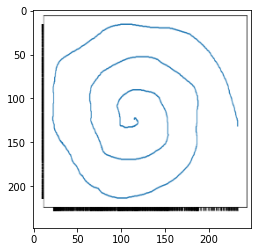

In [ ]:
import cv2
img = plt.imread("/content/Parkinson/healthy ID_0/0_file_df_10.png")
plt.imshow(cv2.resize(img,(248,248)), cmap ="gray")

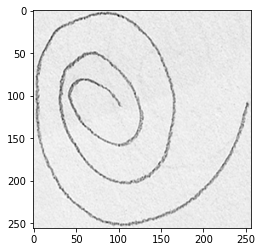

In [ ]:
img = plt.imread("/content/spiral/training/healthy/V55HE06.png")
plt.imshow(img[...,0], cmap = "gray")

In [ ]:
img[...,0].shape

(256, 256)

In [ ]:
x_train = []
y_train = []

import os
import cv2
healthy = os.listdir("/content/Parkinson/healthy ID_0")
parkinson = os.listdir("/content/Parkinson/parkinson ID_0")
healthy.sort()
parkinson.sort()

healthy1 = os.listdir("/content/spiral/training/healthy/")
parkinson1 = os.listdir("/content/spiral/training/parkinson")

for i in range(0, 11):
  img = plt.imread("/content/Parkinson/healthy ID_0/" + str(healthy[i]))
  x_train.append(cv2.resize(img[...,0], (248, 248)))
  y_train.append("1")
  img = plt.imread("/content/Parkinson/parkinson ID_0/" + str(parkinson[i]))
  x_train.append(cv2.resize(img[...,0], (248, 248)))
  y_train.append("0")
#print(np.asarray(x_train).shape)

for i in range(0, 36):
  img = plt.imread("/content/spiral/training/healthy/" + str(healthy1[i]))
  x_train.append(cv2.resize(img[...,0]/255, (248, 248)))
  y_train.append("1")
  img = plt.imread("/content/spiral/training/parkinson/" + str(parkinson1[i]))
  x_train.append(cv2.resize(img[...,0]/255, (248, 248)))
  y_train.append("0")
#print(np.asarray(x_train).shape)

In [ ]:
import numpy as np
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [ ]:
x_train.shape

(94, 248, 248)

In [ ]:
x_train = np.reshape(x_train,( 94, 248, 248, 1))

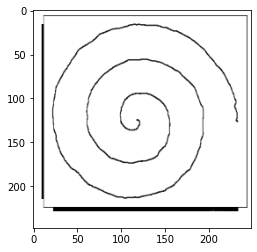

In [ ]:
plt.imshow(x_train[0,...,0], cmap ="gray")

In [ ]:
y_train = y_train.astype('float32')

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)

In [ ]:
y_train.shape

(94, 2)

# **Facial Palsy Data**

In [ ]:
x_train = []
y_train = []

import os
import cv2
healthy_disgust = os.listdir("/content/MMAFEDB/train/disgust")
healthy_happy = os.listdir("/content/MMAFEDB/train/happy")
healthy_surprise = os.listdir("/content/MMAFEDB/train/surprise")
healthy_sad = os.listdir("/content/MMAFEDB/train/sad")
facial_palsy = os.listdir("/content/Strokefaces/droopy")

for i in range(0, 200):
  img = plt.imread("/content/MMAFEDB/train/disgust/" + str(healthy_disgust[i]))
  x_train.append(cv2.resize(img[...,0], (248, 248)))
  y_train.append("1")

  img = plt.imread("/content/MMAFEDB/train/happy/" + str(healthy_happy[i]))
  x_train.append(cv2.resize(img[...,0], (248, 248)))
  y_train.append("1")

  img = plt.imread("/content/MMAFEDB/train/surprise/" + str(healthy_surprise[i]))
  x_train.append(cv2.resize(img[...,0], (248, 248)))
  y_train.append("1")

  img = plt.imread("/content/MMAFEDB/train/sad/" + str(healthy_sad[i]))
  x_train.append(cv2.resize(img[...,0], (248, 248)))
  y_train.append("1")

for i in range(0,800):
  img = plt.imread("/content/Strokefaces/droopy/" + str(facial_palsy[i]))
  x_train.append(cv2.resize(img[...,0], (248, 248)))
  y_train.append("0")

In [ ]:
import numpy as np
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [ ]:
x_train.shape

(1600, 248, 248)

In [ ]:
y_train.shape

(1600,)

In [ ]:
x_train.max()

255.0

In [ ]:
x_train = x_train/255
x_train = np.reshape(x_train,( 1600, 248, 248, 1))
y_train = y_train.astype('float32')
y_train = np.reshape(y_train,( 1600,1))

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)

# **Diabetic Retinopathy Data**

In [ ]:
x_train = []
y_train = []

import os
import cv2
mild = os.listdir("/content/colored_images/colored_images/Mild")
moderate = os.listdir("/content/colored_images/colored_images/Moderate")
No_DR = os.listdir("/content/colored_images/colored_images/No_DR")
Proliferate_DR = os.listdir("/content/colored_images/colored_images/Proliferate_DR")
Severe = os.listdir("/content/colored_images/colored_images/Severe")

for i in range(0, 708):

  img = plt.imread("/content/colored_images/colored_images/No_DR/" + str(No_DR[i]))
  x_train.append(cv2.resize(img[...,0], (248, 248)))
  y_train.append("0")

  img = plt.imread("/content/colored_images/colored_images/Mild/" + str(mild[i]))
  x_train.append(cv2.resize(img[...,0], (248, 248)))
  y_train.append("1")

  img = plt.imread("/content/colored_images/colored_images/Moderate/" + str(moderate[i]))
  x_train.append(cv2.resize(img[...,0], (248, 248)))
  y_train.append("2")

  img = plt.imread("/content/colored_images/colored_images/Proliferate_DR/" + str(Proliferate_DR[i]))
  x_train.append(cv2.resize(img[...,0], (248, 248)))
  y_train.append("3")

  img = plt.imread("/content/colored_images/colored_images/Severe/" + str(Severe[i]))
  x_train.append(cv2.resize(img[...,0], (248, 248)))
  y_train.append("4")

In [ ]:
import numpy as np
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [ ]:
x_train.shape

(3540, 248, 248)

In [ ]:
x_train.max()

1.0

In [ ]:
y_train.shape

(3540,)

In [ ]:
x_train = np.reshape(x_train,( 3540, 248, 248, 1))
y_train = y_train.astype('float32')
y_train = np.reshape(y_train,( 3540,1))

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=5)

# **Model**

In [ ]:
IMAGE_SIZE = 248
EPOCHS=50

BATCH_SIZE = 1600
EPOCHS=50

In [ ]:
#resize_and_rescale = tf.keras.Sequential([
#  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  #layers.experimental.preprocessing.Rescaling(1./255),
#])

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
in_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,1)
model=models.Sequential(
[
    #resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation="relu",input_shape=in_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    #layers.Dense(5, activation='softmax'),
    layers.Dense(5, activation='sigmoid'),
]
)
model.build(input_shape=in_shape)

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
history = model.fit( x_train, y_train, epochs=500)

Epoch 1/500
111/111 [==============================] - 13s 106ms/step - loss: 0.5184 - accuracy: 0.1977
Epoch 2/500
111/111 [==============================] - 12s 106ms/step - loss: 0.5019 - accuracy: 0.1963
Epoch 3/500
111/111 [==============================] - 12s 106ms/step - loss: 0.5017 - accuracy: 0.2037
Epoch 4/500
111/111 [==============================] - 12s 106ms/step - loss: 0.5015 - accuracy: 0.1966
Epoch 5/500
111/111 [==============================] - 12s 106ms/step - loss: 0.5016 - accuracy: 0.2014
Epoch 6/500
111/111 [==============================] - 12s 107ms/step - loss: 0.5013 - accuracy: 0.1983
Epoch 7/500
111/111 [==============================] - 12s 106ms/step - loss: 0.5011 - accuracy: 0.1992
Epoch 8/500
111/111 [==============================] - 12s 107ms/step - loss: 0.5012 - accuracy: 0.2017
Epoch 9/500
111/111 [==============================] - 12s 107ms/step - loss: 0.5009 - accuracy: 0.2090
Epoch 10/500
111/111 [==============================] - 12s 107m

In [ ]:
model.save_weights("/content/facial_palsy.h5")

# **Model2**

In [ ]:
in_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,1)
model=models.Sequential(
[
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation="relu",input_shape=in_shape),
    layers.MaxPooling2D((2,2)),
    layers.BatchNormalization(),
 
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
 
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
 
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
 
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
 
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='softmax'),
]
)
model.build(input_shape=in_shape)

In [ ]:
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))

In [ ]:
x_train.shape

(94, 248, 248, 1)

In [ ]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[f1_m])

# fit the model
history = model.fit(x_train, y_train, validation_split=0.3, epochs=500)

Epoch 1/500
3/3 [==============================] - 3s 274ms/step - loss: 0.7532 - f1_m: 0.7762 - val_loss: nan - val_f1_m: nan
Epoch 2/500
3/3 [==============================] - 0s 115ms/step - loss: 0.7248 - f1_m: 0.4528 - val_loss: nan - val_f1_m: nan
Epoch 3/500
3/3 [==============================] - 0s 104ms/step - loss: 0.7142 - f1_m: 0.4535 - val_loss: nan - val_f1_m: nan
Epoch 4/500
3/3 [==============================] - 0s 105ms/step - loss: 0.6996 - f1_m: 0.4460 - val_loss: nan - val_f1_m: nan
Epoch 5/500
3/3 [==============================] - 0s 106ms/step - loss: 0.7498 - f1_m: 0.7774 - val_loss: nan - val_f1_m: nan
Epoch 6/500
3/3 [==============================] - 0s 108ms/step - loss: 0.7891 - f1_m: 0.4535 - val_loss: nan - val_f1_m: nan
Epoch 7/500
3/3 [==============================] - 0s 105ms/step - loss: 0.7532 - f1_m: 0.7774 - val_loss: nan - val_f1_m: nan
Epoch 8/500
3/3 [==============================] - 0s 106ms/step - loss: 0.7235 - f1_m: 0.4528 - val_loss: nan 

# **Parkinson's Disease Predictions**

In [ ]:
img = plt.imread("/content/Parkinson/parkinson ID_0/0_file_df_20.png")
img = np.asarray(img)
img = np.resize(img, (IMAGE_SIZE, IMAGE_SIZE,1))


In [ ]:
img.shape

(248, 248, 1)

In [ ]:
img = np.reshape(img,(1, IMAGE_SIZE, IMAGE_SIZE, 1))
model.predict(img).argmax()

0

In [ ]:
x_test = []
y_test = []

import os
healthy = os.listdir("/content/Parkinson/healthy ID_0")
parkinson = os.listdir("/content/Parkinson/parkinson ID_0")
healthy.sort()
parkinson.sort()

for i in range(12, 15):
  img = plt.imread("/content/Parkinson/healthy ID_0/" + str(healthy[i]))
  img = np.asarray(img)
  img = np.resize(img, (IMAGE_SIZE, IMAGE_SIZE,1))
  x_test.append(img)
  y_test.append("1")
for i in range(12, 20):
  img = plt.imread("/content/Parkinson/parkinson ID_0/" + str(parkinson[i]))
  img = np.asarray(img)
  img = np.resize(img, (IMAGE_SIZE, IMAGE_SIZE,1))
  x_test.append(img)
  y_test.append("0")

In [ ]:
x_test = np.asarray(x_test)

In [ ]:
x_test = np.reshape(x_test,(11, IMAGE_SIZE, IMAGE_SIZE, 1))
y_pred=[]
for i in x_test:
  i = np.reshape(i,(1, IMAGE_SIZE, IMAGE_SIZE, 1))
  y_pred.append(model.predict(i).argmax())

In [ ]:
from sklearn import metrics
metrics.confusion_matrix(np.array(y_test).astype('float32'), y_pred)

array([[8, 0],
       [3, 0]])

In [ ]:
y_pred

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
# 59% on training - model

In [ ]:
model.save_weights("/content/model2_weights")